In [1]:
import pandas as pd

In [2]:
train_x = pd.read_csv('../input/titanic/train.csv')
test_x = pd.read_csv('../input/titanic/test.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

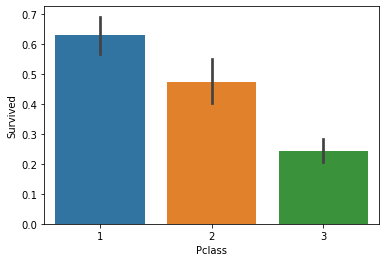

In [4]:
sns.barplot(x='Pclass', y='Survived', data=train_x)

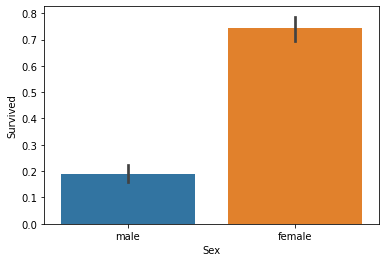

In [5]:
sns.barplot(x='Sex', y='Survived', data=train_x)

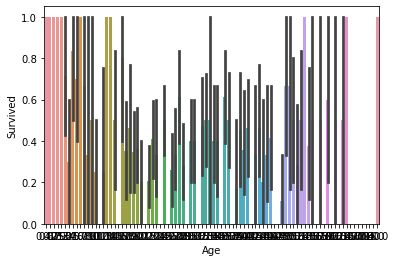

In [6]:
sns.barplot(x='Age', y='Survived', data=train_x)

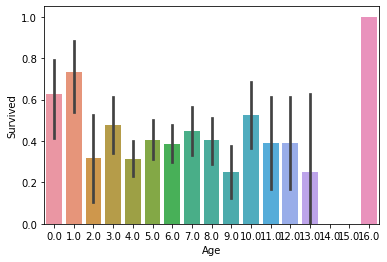

In [7]:
import numpy as np

def make_bins(d, col, factor=2):
    rounding = lambda x : np.around(x/factor)
    d[col] = d[col].apply(rounding)
    return d

t = make_bins(train_x.copy(True), 'Age', 5)
sns.barplot(x='Age', y='Survived', data=t)

In [8]:
train_x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_x['Title'] = train_x.Name.str.extract('([A-Za-z]+)\.', expand=False)
train_x['Title'].value_counts()
train_x['Title'] = train_x['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Johkheer', 'Dona'], 'Rare')
train_x['Title'] = train_x['Title'].replace('Mlle', 'Miss')
train_x['Title'] = train_x['Title'].replace('Ms', 'Miss')
train_x['Title'] = train_x['Title'].replace('Mme', 'Miss')

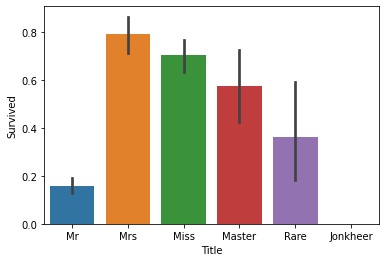

In [11]:
sns.barplot(x='Title', y='Survived', data=train_x)

In [12]:
_, train_x['Title'] = np.unique(train_x['Title'], return_inverse=True)
train_x.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

In [13]:
_, train_x['Sex'] = np.unique(train_x['Sex'], return_inverse=True)

train_y = np.ravel(train_x.Survived)
train_x.drop(['Survived'], inplace=True, axis=1)

In [14]:
train_x.dropna(inplace=True)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(train_x, train_y, batch_size=1)

891/891 [==============================] - 2s 2ms/step - loss: 0.5978 - accuracy: 0.6543


In [20]:
to_test = test_x.copy(True)

to_test['Title'] = to_test.Name.str.extract('([A-Za-z]+)\.', expand=False)
to_test['Title'] = to_test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Johkheer', 'Dona'], 'Rare')
to_test['Title'] = to_test['Title'].replace('Mlle', 'Miss')
to_test['Title'] = to_test['Title'].replace('Ms', 'Miss')
to_test['Title'] = to_test['Title'].replace('Mme', 'Miss')

_, to_test['Title'] = np.unique(to_test['Title'], return_inverse=True)


to_test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
_, to_test['Sex'] = np.unique(test_x['Sex'], return_inverse=True)

In [21]:
results = model.predict(to_test)

In [22]:
results

array([[0.2852628 ],
       [0.5041526 ],
       [0.29037052],
       [0.2852628 ],
       [0.5041526 ],
       [0.2852628 ],
       [0.5362451 ],
       [0.29037052],
       [0.5041526 ],
       [0.2852628 ],
       [0.2852628 ],
       [0.3632272 ],
       [0.5636319 ],
       [0.29037052],
       [0.5636319 ],
       [0.50473607],
       [0.29037052],
       [0.2852628 ],
       [0.5362451 ],
       [0.5041526 ],
       [0.3632272 ],
       [0.3979448 ],
       [0.5636319 ],
       [0.3632272 ],
       [0.5636319 ],
       [0.2852628 ],
       [0.52591276],
       [0.2852628 ],
       [0.3632272 ],
       [0.2852628 ],
       [0.29037052],
       [0.29037052],
       [0.5041526 ],
       [0.5041526 ],
       [0.3632272 ],
       [0.2852628 ],
       [0.5362451 ],
       [0.5362451 ],
       [0.2852628 ],
       [0.2852628 ],
       [0.2852628 ],
       [0.3632272 ],
       [0.2852628 ],
       [0.50473607],
       [0.5636319 ],
       [0.2852628 ],
       [0.3632272 ],
       [0.285

In [23]:
rounded = [int(round(x[0])) for x in results]


In [24]:
submission = pd.DataFrame({
    'PassengerId': test_x['PassengerId'],
    'Survived': rounded
})

In [ ]:
submission.to_csv('results.csv', index=False)